In [84]:
import sympy as sp

vars = sp.symbols("x y m b N")
x, y, m, b, N = vars
expr = ((y - (m*x + b)) ** 2)/(2*N)
display(expr)

display(expr.subs({N: 2, b: 4, m: 5}))

# Substituting all values
display(expr.subs({N: 2, b: 4, m: 5, x: 2, y: 5}))

(-b - m*x + y)**2/(2*N)

(-5*x + y - 4)**2/4

81/4

In [85]:
# Partial derivative expr with respect to b
diff = sp.diff(expr, b)
display(diff.simplify())

# Partial derivative expr with respect to m
display(sp.diff(expr, m).simplify())

(b + m*x - y)/N

x*(b + m*x - y)/N

In [86]:
import numpy as np

X = np.linspace(0, 100, 50) # Generate 50 uniform difference values between 0 and 100
delta = np.random.uniform(-10, 10, X.size) # Generate 50 random values between -10 and 10
Y = 0.5 * X + 3 + delta # Y = mX + C

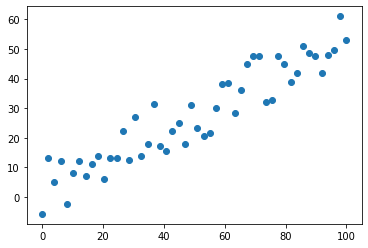

In [87]:
import matplotlib.pyplot as plt
plt.scatter(X, Y) 

In [88]:
def gradient_descent(b_val, m_val, x_val, y_val, learning_rate, num_iterations):
    # Defining the error function
    vars = sp.symbols('x y m b n')
    x, y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((y - (m*x+b))**2))

    #calculating the partial derivatives
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)

    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            b_gradient += error_function_b.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})
            m_gradient += error_function_m.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})

        #update the value for b and m    
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        
    return [b_val, m_val]

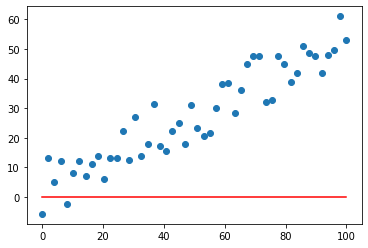

In [89]:
b_val = 0
m_val = 0

# Without linear regression, no change in unknown variable values
predictions = (m_val * X + b_val)
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

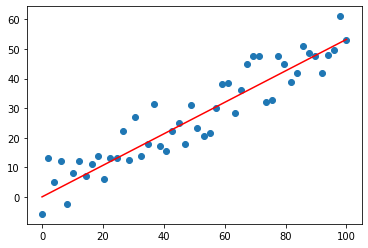

In [90]:
b_val, m_val = gradient_descent(0, 0, X, Y, 0.0001, 10)

predictions = m_val * X + b_val
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

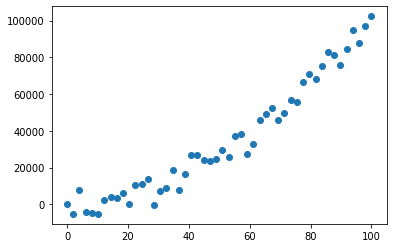

In [97]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 100, 50)
delta = np.random.uniform(-10000, 10000, X.size)
Y = 10 * X ** 2 + 0.5 * X + 5 + delta
plt.scatter(X, Y)

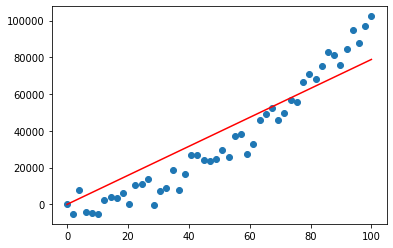

In [98]:
b_val, m_val = gradient_descent(0, 0, X, Y, 0.0001, 20)

prediction = m_val * X + b_val
plt.scatter(X, Y)
plt.plot(X, prediction, color='r')

In [110]:
def gradient_descent_poly(a_val, b_val, c_val, x_val, y_val, learning_rate, num_iterations):
  a, b, c, x, y, n = sp.symbols("a b c x y n")
  total_datapoints = len(x_val)
  error_function = (((y-(a*(x**2)+b*x+c))**2)/(2*n))

  error_function_a = sp.diff(error_function, a)
  error_function_b = sp.diff(error_function, b)
  error_function_c = sp.diff(error_function, c)

  for _ in range(num_iterations):
    a_gradient = 0
    b_gradient = 0
    c_gradient = 0
    for i in range(total_datapoints):
      a_gradient += error_function_a.subs({a: a_val, b: b_val, c: c_val, x: x_val[i], y: y_val[i], n: total_datapoints})
      b_gradient += error_function_b.subs({a: a_val, b: b_val, c: c_val, x: x_val[i], y: y_val[i], n: total_datapoints})
      c_gradient += error_function_c.subs({a: a_val, b: b_val, c: c_val, x: x_val[i], y: y_val[i], n: total_datapoints})
    a_val -= (learning_rate * a_gradient)
    b_val -= (learning_rate * b_gradient)
    c_val -= (learning_rate * c_gradient)

  return [a_val, b_val, c_val]

[10.2718723480398, -4.80807687036353, -4.99743415409640]


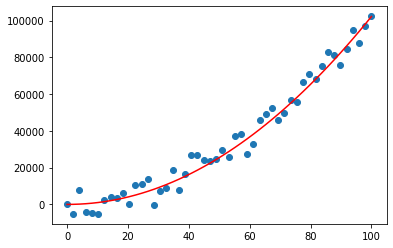

In [112]:
predictions = gradient_descent_poly(-5, -5, -5, X, Y, 0.00000001, 20)
print(predictions)
plt.scatter(X, Y)
plt.plot(X, (predictions[0] * (X ** 2)) + predictions[1] * X + predictions[2], color='r')

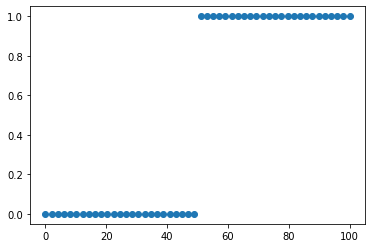

In [113]:
X = np.linspace(0, 100, 50)
Y = np.zeros(X.size)
Y[25:50] = 1
plt.scatter(X, Y)

In [123]:
def gradient_descent_logistic(b_val, m_val, x_val, y_val, learning_rate, num_iterations):
    # Defining the error function
    vars = sp.symbols('x y m b n')
    x,y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = -(1/(n)) * ((y * sp.log(1/ (1+(sp.exp(-(m*x+b)))))) + ((1-y) * sp.log(1 - (1/ (1+(sp.exp(-(m*x+b))))))))

    #calculating the partial derivatives
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)

    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            b_gradient += error_function_b.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})
            m_gradient += error_function_m.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})

        #update the value for b and m    
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        
    return [b_val, m_val]

In [ ]:
import math
vals = gradient_descent_logistic(-10, -5, X, Y, .01, 20)
m_val = vals[1]
b_val = vals[0]
print(m_val, b_val)
predictions = [1/(1+math.exp(-((m_val * X[i]) + b_val))) for i in range(len(X))]
# plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

In [128]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0, test_size=0.2)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
print("Accuracy {:.2f}".format(lgr.score(X_test, y_test)))
print("Accuracy {:.2f}".format(accuracy_score(y_test, lgr.predict(X_test))))


Accuracy 1.00
Accuracy 1.00


D:\Softwares\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
